In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

 # EDA to Prediction(DieTaninc)
 
 Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.
 
 EDA란?????
 1. 각 필드에 대한 변량 시각화
 2. 데이터셋의 각 변수와 관찰 변수간의 관계를 평가
 3. 각각 필드간의 상호작용~

타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다. 1912년 4월 15일 첫 항해 중 타이타닉호는 빙산과 충돌, 침몰하여 2224명의 승객과 승무원 중 1502명이 사망했습니다. 그래서 DieTanic입니다. 이 재난은 세상 누구도 잊은 이 없는 굉장히 잊지 못할 재난입니다.

타이타닉을 만드는 데 약 750만 달러가 들었고 충돌로 인해 바다에 가라앉았습니다. Titanic Dataset은 초보자가 데이터 사이언스의 여정을 시작하고 캐글의 컴퍼티션에 참가할 수 있는 매우 좋은 데이터셋입니다.

이 노트북의 목적은 **예측 모델링 문제의 워크플로우가 어떤 것인지 아이디어를 제공**하는 것입니다. 기능을 확인하는 방법, 새로운 기능 및 일부 기계학습 개념을 추가하는 방법. 저는 초보자도 모든 단계를 이해할 수 있도록 노트북을 가능한 한 기초적 내용으로 유지하려고 노력했습니다.

이 노트북이 좋다고 생각하고 도움이 됐으면 upvote 눌러주셈.. 동기부여됨!

## **노트북 컨텐츠:**

**Part1 : Exploratory Data Analysis(EDA) - 탐색적 데이터 분석**
1) feature 분석    
2) 여러 feature를 고려하여 관계 또는 트렌드 찾기    

**Part2 : Feature Engineering and Data Cleaning**
1) 몇개의 feature들을 추가    
2) 중복되는 feature 제거    
3) 모델링에 적합한 형태로 feature 변환

**Part3 : Predictive Modeling**
1) 베이직 알고리즘 실행    
2) cross validation    
3) 앙상블    
4) 중요 feature 추출

## **Part1 : Exploratory Data Analysis(EDA)**


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # 특정 스타일 사용(구글링하면나옴)
import warnings
warnings.filterwarnings('ignore') # warning 무시
%matplotlib inline


In [102]:
data = pd.read_csv('../content/titanic/train.csv')

# tr셋을 data에다가 담았어요

In [103]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
data.isnull().sum()
# null값 확인
# age, cabin에 개많고 embarked에 2개있다

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

age, cabin, embarked에 널 값이 있네예
저걸 없애보겠어요

**얼마나 생존했나요?**    
한 번 봅쉬다

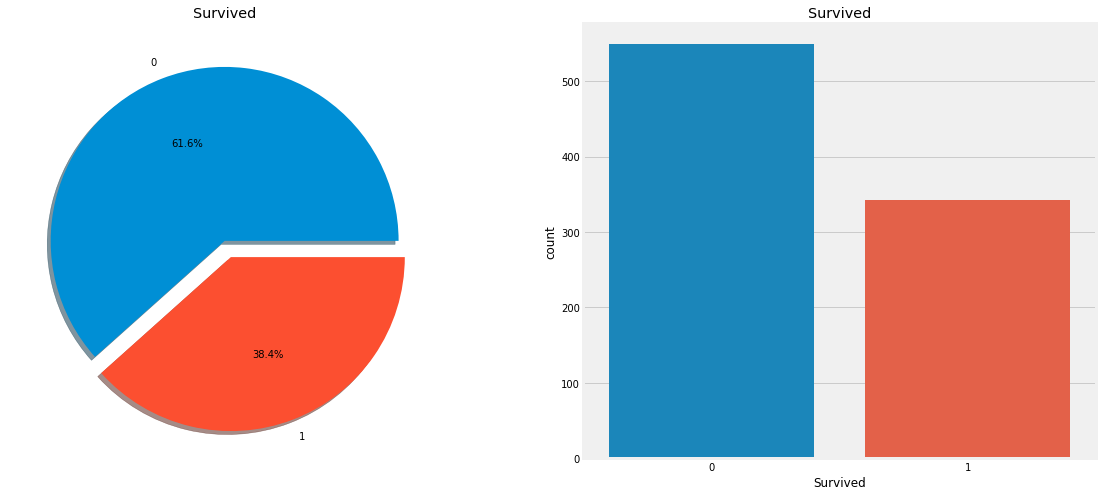

In [105]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# 객체생성
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
# tr셋에서 Survived 컬럼의 데이터에서 값을 count해서 파이차트 그리기
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# 생존여부에 따른 비율과 amount를 알 수 있다.


명백하게 많은 탑승객이 살아남지 못한 것을 알 수 있당..

tr set에 있는 891명의 승객 중 약 350명만 생존했습니다. 즉, 전체 tr set의 38.4%만이 충돌에서 생존했습니다. 데이터에서 더 나은 인사이트를 얻고 생존한 승객 카테고리와 생존하지 못한 승객 카테고리를 확인하려면 더 자세히 파봐야됩니다.

데이터셋의 다양한 기능을 활용하여 생존율을 확인하려고 합니다. feature 중 sex, port of embarcation, age 등.

먼저 feature들의 다른 타입들을 이해해봅시다.

## **Types Of Features**

* **Categorical Features:**
범주형 변수는 두 개 이상의 범주가 있는 변수이며 해당 기능의 각 값은 범주별로 분류될 수 있습니다. 예를 들어, 성별은 두 개의 범주(남성과 여성) 가 있는 범주형 변수입니다. 이제 우리는 그러한 변수를 정렬할 수 없거나 순서를 지정할 수 없습니다?
명목변수라고도 합니다.

**범주형 Features : Sex, Embarked**


* **순서형 Features:**
순서형 범주(Ordinal Variable)는 범주형 변수와 비슷하지만, 두 값 사이에 상대적인 순서를 지정하거나 정렬할 수 있다는 차이점이 있습니다. 예를 들어, 길다, 중간, 짧다 라는 값을 가지는 Height feature는 서수 변수입니다. 여기서 우리는 변수에 상대적인 값으로 정렬을 할 수 있습니다.

**순서형 Features : Pclass**


* **연속형 Feature:**
특성이 두 점 사이 또는 특성 열의 최소값 또는 최대값 사이의 값을 취할 수 있는 경우 특성을 연속적이라고 합니다.

**연속형 Feature : Age**

## Feature 분석
### Sex -> 범주형 feature

In [106]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

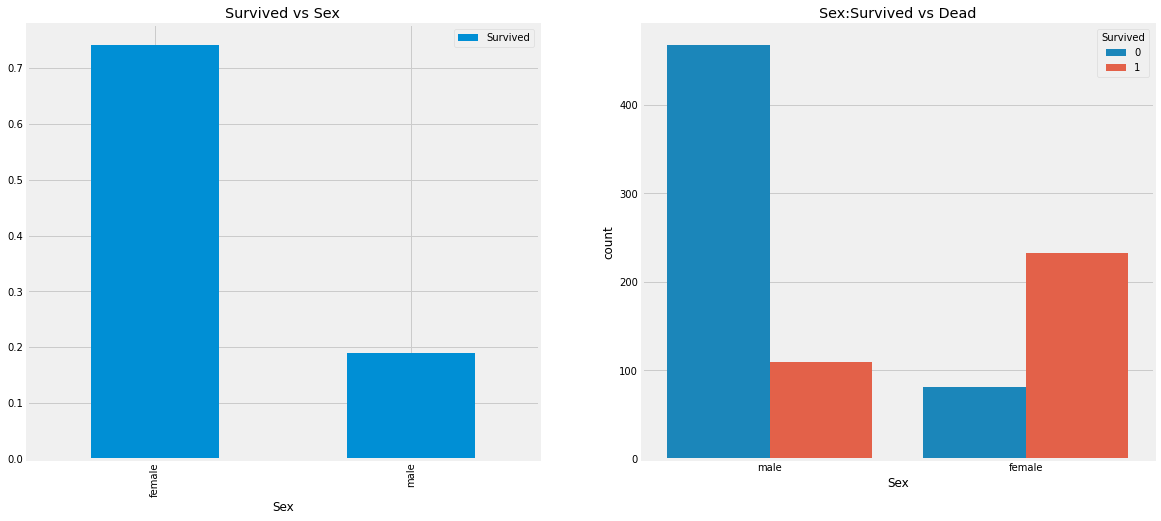

In [107]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

흥미롭습니다. 배에 탄 남성의 숫자는 여성의 숫자보다 훨씬 많습니다. 그러나 구조된 여성의 수는 구조된 남성의 수의 거의 두 배입니다. 배에 탄 여성의 생존율은 약 75%고(왼쪽그래프) 반면에 남성의 생존율은 약 18-19%입니다.

이 특징은 모델링에 매우 중요한 feature인 것 같습니다. 그런데 이게 최선일까요?? 다른 기능을 한 번 확인해봅시다.

## Pclass -> 순서형 Feature


In [108]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


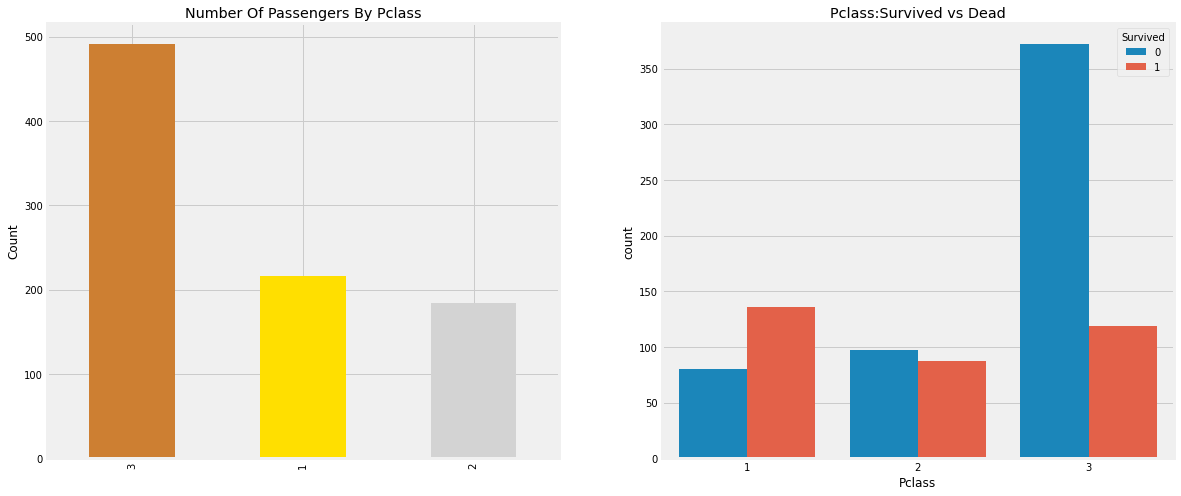

In [109]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data = data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 무릇 **돈으로 모든 것을 살 수는 없다고 말합니다.** 그러나 우리는 Pclass 1의 탑승객들이 구조 당시 매우 높은 우선순위를 부여받았다는 것을 분명히 알 수 있습니다. Pclass 3의 승객 수가 훨씬 많았음에도 불구하고 여전히 생존자의 수는 매우 낮습니다. 약 25% 정도로.

Pclass 1의 경우 생존율은 약 63%이고 Pclass2의 경우 약 48%입니다. 그래서 돈과 지위가 중요합니다. Such a meterialistic world! 이런 물질만능주의!

조금 더 자세히 살펴보고 다른 흥미로운 관찰을 확인해 보겠습니다. Sex와 Pclass에 따른 생존율을 확인해봅시다.


In [110]:
pd.crosstab([data.Sex,data.Survived], data.Pclass, margins = True).style.background_gradient(cmap='summer_r')

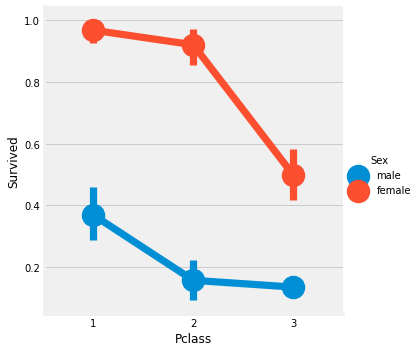

In [111]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = data)
plt.show()

이 경우 Factorplot을 사용합니다. 범주형 값을 쉽게 분리할 수 있기 때문입니다.

crosstab과 factorplot을 보면 pclass1의 여성 94명 중 3명만 사망했기 때문에 Pclass1의 여성 생존율이 약 95-95%임을 쉽게 추론할 수 있습니다.

Pclass와 상관없이 구조 시 여성이 우선인 것은 분명합니다. pclass1의 남자조차도 생존율이 매우 낮습니다.

pclass도 중요한 feature인 것 같습니다. 다른 feature를 분석해봅시다~

## Age -> Continuos Feature

In [112]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')


Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


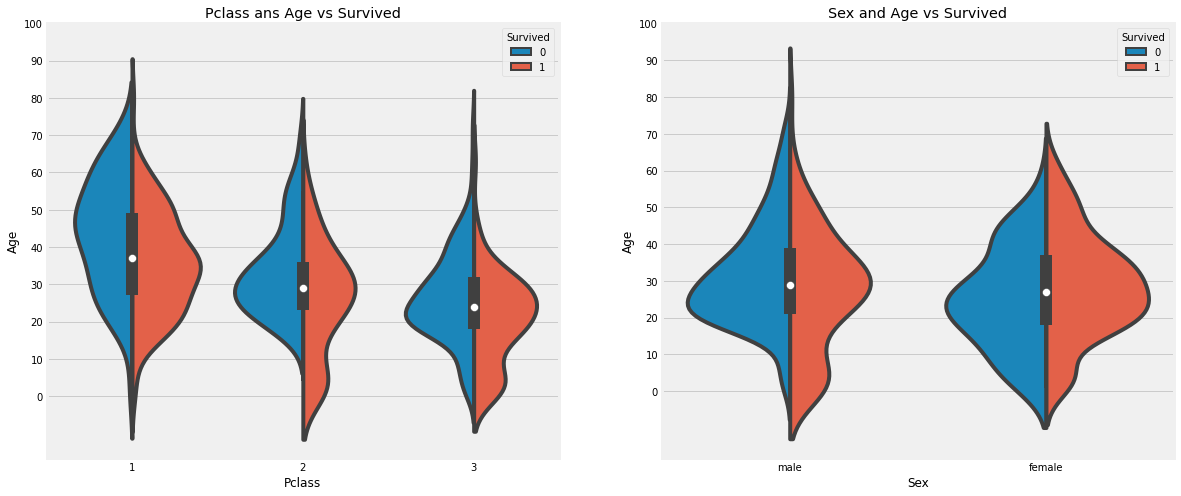

In [113]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot("Pclass","Age", hue ="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass ans Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived", data = data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**관찰결과:**
1) Pclass에 상관없이 아동의 수는 증가하고 10세 미만 승객(즉 아동)의 생존율은 pclass에 상관없이 양호해 보인다.
2) pclass1의 20~50세 승객의 생존 가능성이 높고 여성이 더 낫습니다.
3) 남성의 경우 나이가 많을 수록 생존 확률이 낮아집니다.

이전에 보았듯 Age feature에는 177개의 null값이 있습니다. 이러한 nan값을 대체하기 위해 데이터셋의 평균 Age를 할당 할 수 있습니다.

하지만 문제는 다양한 연령대의 사람들이 많았다는 것입니다... 우리는 평균 연령이 29세인 4세 아이를 할당할 수 없습니다!! 

빙고! 이름 feature를 확인할 수 있죠 ~ feature를 살펴보면 이름에 Mr 또는 Mrs와 같은 salutation이 있음을 알 수 있습니다. 따라서 Mr 및 Mrs의 평균값을 각 그룹에 할당할 수 있습니다.

### 이름에 뭐가 있는지 확인해보자 feature로 만들어보자

In [114]:
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

자 여기서 정규표현식을 사용하고 있습니다. ([A-Za-z]+)\. <- 이거요
A-Z 또는 a-z 사이에 있고 뒤에 점(.) 이 오는 문자열을 찾는 것입니다. 따라서 이름의 이니셜을 잘 추출해 냅니다.

In [115]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


좋습니다. Miss를 나타내는 Mlle 또는 Mme와 같이 철자가 틀린 이니셜이 있네요. 그것들을 Miss로 대체하고 다른 값에 대해서도 같은 것을 사용하겠습니다.

In [116]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [117]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### NaN Age 채우기

In [118]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [119]:
data.Age.isnull().any()

False

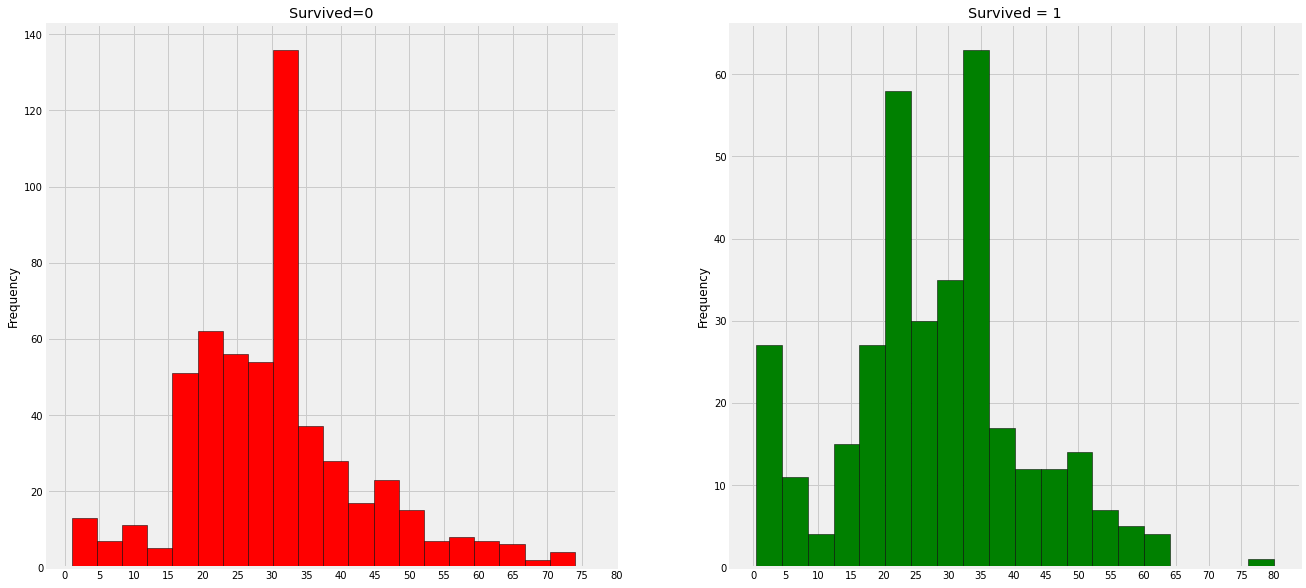

In [120]:
f, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins = 20, edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**관찰결과:**
1) 유아(5세미만)를 많이 구함(여성아동 우선구조 정책)
2) 가장 나이많은 승객도 구조됐다.(80세)
3) 최대 사망자 수는 30~40대 연령층이었다.

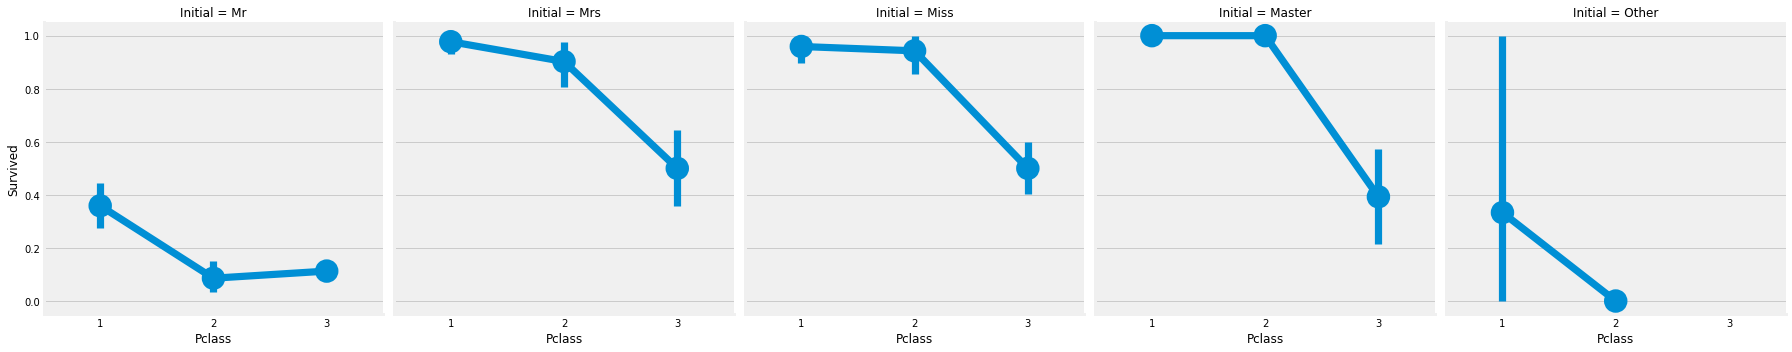

In [121]:
sns.factorplot('Pclass','Survived', col='Initial', data=data)
plt.show()


따라서 여성아동우선 구조정책은 class에 관계없이 유효합니다.

### Embarked -> 범주형 변수


In [122]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

**승선항에 따른 생존 가능성.**

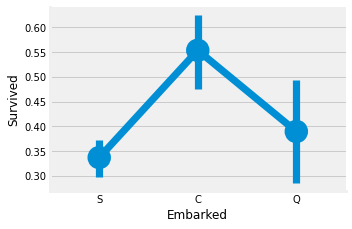

In [123]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
# gcf : get current figure 현재 그래프를 보여줌
fig.set_size_inches(5,3)
plt.show()

포트 c의 생존 가능성은 약 0.55로 가장 높고 s의 경우 가장 낮습니다.

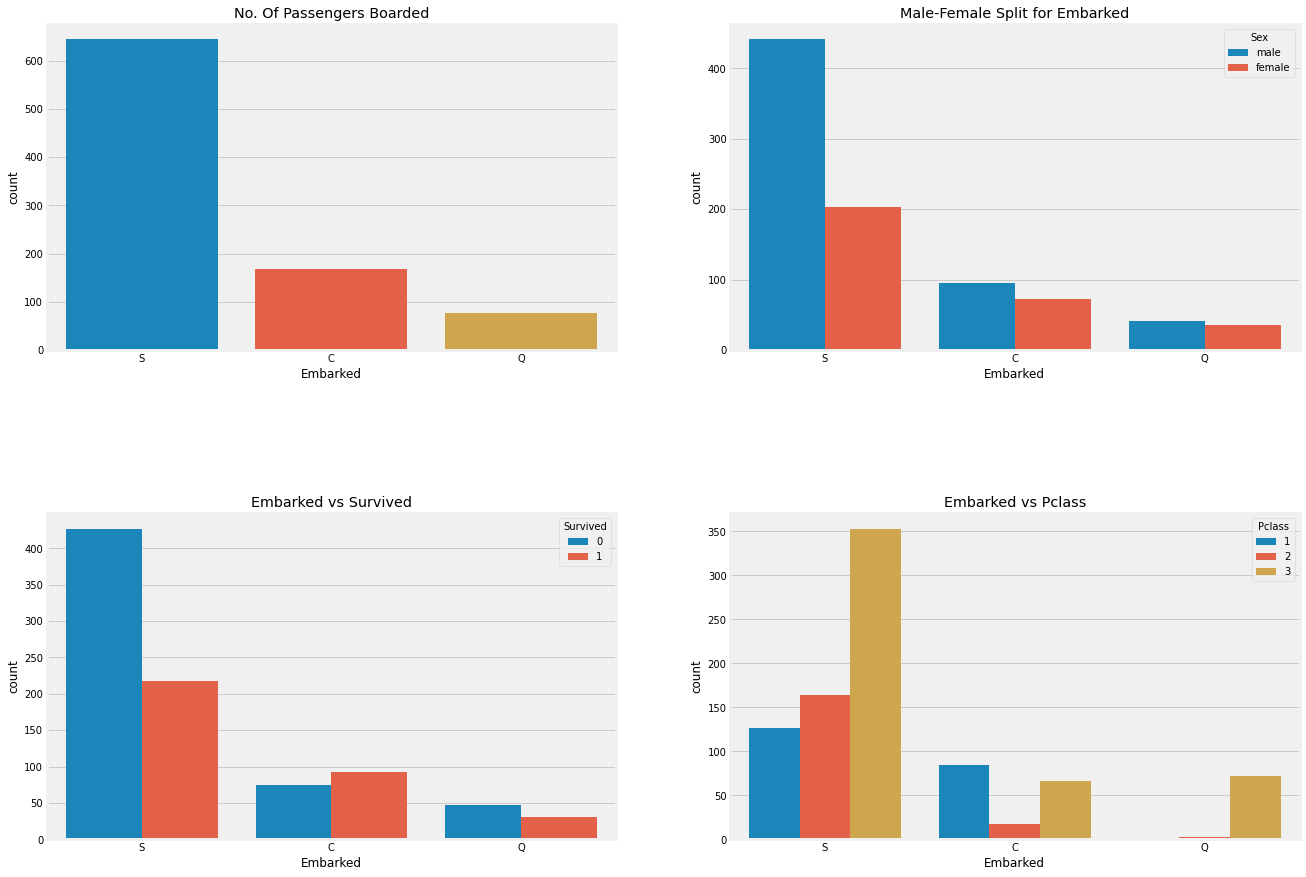

In [124]:
f, ax = plt.subplots(2,2, figsize =(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass',data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**관찰결과:**
1) S에서 가장 많은 승객들이 탑승을 했습니다. 대부분이 class 3 승객들입니다.
2) c 탑승객들은 그들 중 상당수가 살아남았기 때문에 운이 좋아 보입니다. 그 이유는 아마도 모든 Pclass1 및 Pclass2 승객이 구조되었기 때문입니다.
3) 탑승 항구 s는 부자들이 많이 탄 것으로 보입니다. 그러나 생존 가능성은 낮습니다. pclass 3의 승객 중 81%가 생존하지 못했기 때문입니다. 
4) Q는 승객들의 약 95%가 class 3입니다.

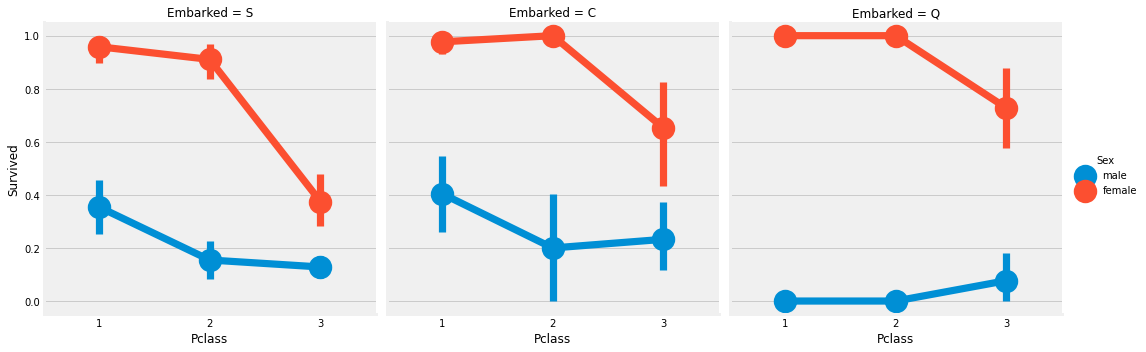

In [125]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

**관찰결과:**
1) pclass에 관계없이 pclass1과 pclass2는 여성의 생존 확률이 거의 1입니다.
2) port3에서, 남녀 모두 생존율이 매우 낮기 때문에 port s는 pclass3 탑승자들에게 매우 불행해 보입니다. (돈문제임)
3) 거의 모든것이 pclass3에서 나왔기 때문에 portQ는 남성에게 가장 불행해보입니다.

### Embarked NaN값 채우기
포트 S에서 탑승객이 최대였으므로, 우리는 NaN값을 S로 채우겠습니다.


In [126]:
data['Embarked'].fillna('S',inplace=True)

In [127]:
data.Embarked.isnull().any()

False

### SibSp -> Discrete Feature
이 feature는 어떤 사람이 혼자인지, 아니면 가족과 함께 있는지를 나타냄.    
sibling = 형제자매 이복형제자매    
spouse = 남편, 아내


In [128]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


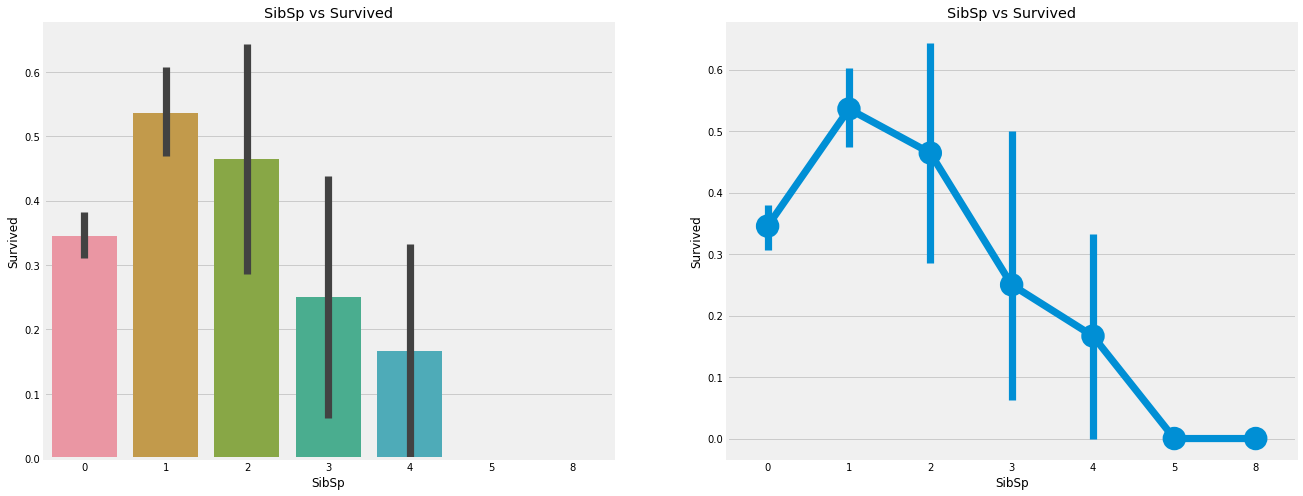

In [129]:

f, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('SibSp','Survived', data=data, ax=ax[0])
# This creates 'Figure 2' but instead of drawing on Figure 2 
# you tell seaborn to draw on axes[0] from Figure 1, so Figure 2 remains empty.
ax[0].set_title('SibSp vs Survived')

sns.pointplot('SibSp','Survived', data= data, ax=ax[1], sharey=False)
ax[1].set_title('SibSp vs Survived')

# plt.close(2)
plt.show()

# factorplot은 그림그리는 그래프? 성질이고 pointplot은 축기반? 이라서? 된다?네?
# catplot 또는 factorplot은 그림 수준 함수입니다. 
# 이것은 그들이 축의 수준이 아닌 그림의 수준에서 작업해야한다는 것을 의미합니다.
# https://stackoverflow.com/questions/54959764/seaborn-factorplot-generates-extra-empty-plots-below-actual-plot

In [130]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**관찰결과:**
barplot 및 factorplot(pointplot)은 승객이 형제 없이 혼자 탑승하는 경우 생존율이 34.5%임을 보여줍니다.
형제 수가 증가하면 그래프가 대략적으로 감소합니다. 이것은 의미가 있습니다. 즉, 배에 가족이 있다면 나 자신을 먼저 구하는 것이 아니라 가족을 구하려고 합니다. 놀랍게도 5~8인 가족의 생존율은 0%입니다. 그 이유는 아마도 Pclass???

네. 그 이유는 Pclass였습니다... crosstab은 형제수가 3보다 많은 사람들이 모두 pclass 3에 있는 것을 보여줍니다.. 형제수가 3보다 많은, pclass 3의 모든 대가족이 사망하는 것이 임박했습니다?

### Parch


In [131]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')
# parch 별 class 등급


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


더 대가족일수록 pclass 3에 있음을 보여줌.

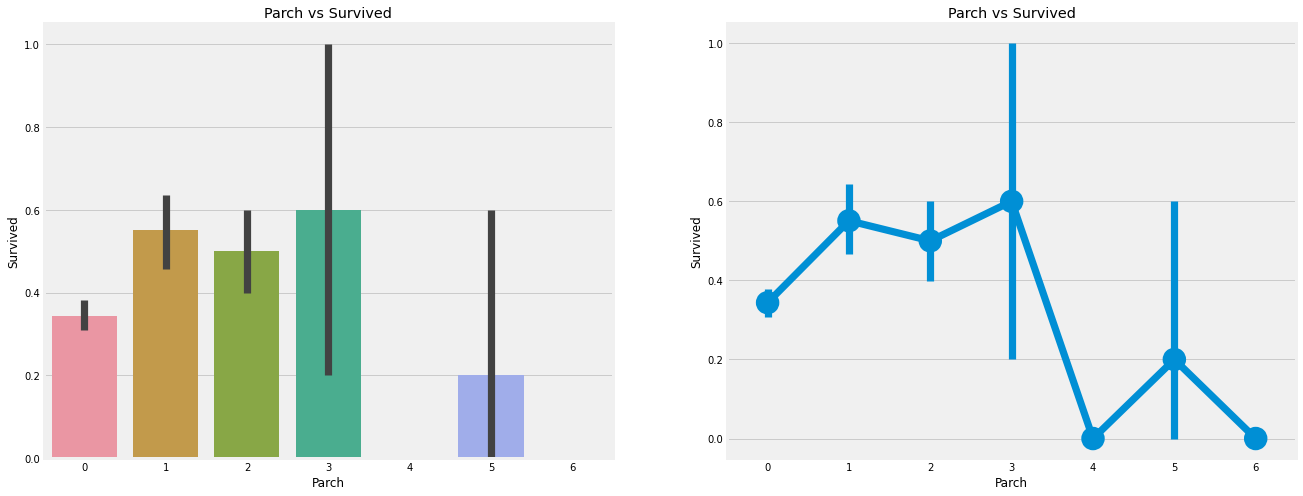

In [132]:
f, ax= plt.subplots(1,2, figsize=(20,8))
sns.barplot('Parch','Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

**관찰결과:**
여기서도 결과는 매우 유사합니다. 부모와 함께 탑승한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 커질수록 감소합니다.

배에 1~3명의 부모가 있는 사람에게는 생존가능성이 높습니다. 혼자있는 것도 치명적이며 배에 부모가 4명 이상인 경우 생존 가능성이 감소합니다.

## Fare -> 연속형 feature

In [133]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())


Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


최저 운임은 0.0입니다. 와오! 공짜 럭셔리 탑승!@!#! ~(어쩔)~

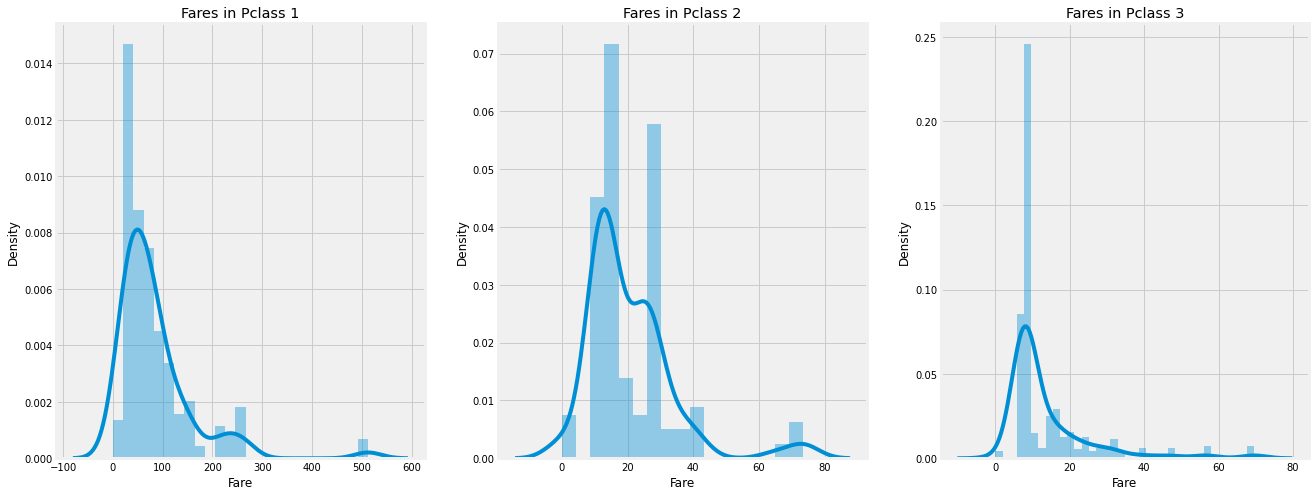

In [134]:
f, ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
# pclass가 1인 데이터별 fare 분포 보
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

pclass1승객의 운임 분포가 크게 나타나고 이 분포는 기준이 감소함에 따라 계속 감소합니다. 이것도 연속적이므로 binning을 사용하여 이산 값으로 변환할 수 있습니다.(구간화)

### 모든 features에 대한 간략한 관찰결과:
**Sex:** 여성의 생존 가능성은 남성에 비해 높습니다.    

**Pclass:** 1등석 승객이 되면 생존 가능성이 더 높아진다는 가시적인 추세가 있습니다. pclass3의 생존율은 매우 낮습니다. 여성의 경우 pclass1의 생존 확률은 거의 1이고 pclass2의 생존 확률도 높습니다. 돈이 이긴다!!!! ~오바쩐다~

**Age:** 5~10 세 미만의 어린이는 생존 가능성이 높습니다. 15세에서 35세 사이의 승객이 많이 사망했습니다. 

**Embarked:** 이것은 매우 흥미로운 feature입니다. pclass1 승객의 대다수가 S에서 탑승했음에도 불구하고 C에서 생존할 확률이 더 높아 보입니다. Q의 승객들은 모두 Pclass에서 왔기 때문에1!!!!

**Parch+SibSp:** 1-2명의 형제자매, 배우자가 탑승하거나 1-3명의 부모가 있는 경우, 혼자이거나 대가족이 함께 여행하는 것보다 생존확률이 더 높습니다.


### feature간의 상관관계

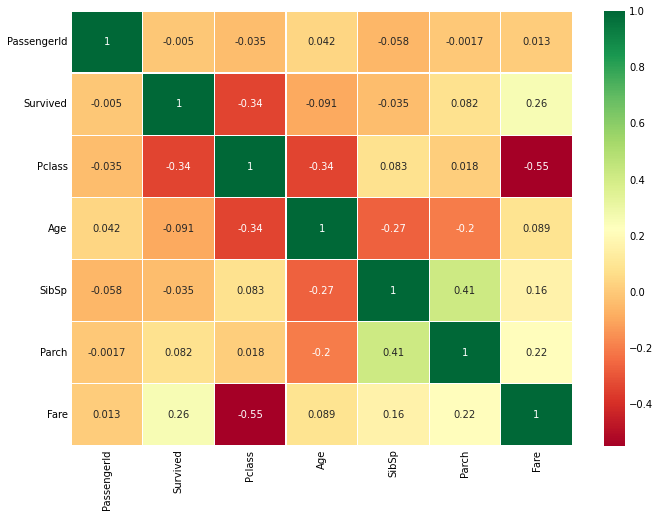

In [135]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
# data.corr() - 상관관계 매트릭스
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### **히트맵 해석**
가장 먼저 주목해야 할 것은 알파벳이나 문자열 사이의 상관 관계를 알 수 없다는 것이 분명하기 때문에 숫자 기능만 비교 가능하다는 것입니다. 플롯을 이해하기 전에 상관관계가 정확히 무엇인지 살펴보겠습니다.

**양의 상관 관계:** 특성 A의 증가가 특성 B의 증가로 이어진다면 양의 상관관계가 있습니다. 값 1은 완전한 양의 상관관계를 의미합니다.

**음의 상관 관계:** 특성 A의 증가가 특성 B의 감소로 이어지는 경우, 음의 상관관계가 있습니다. 값 -1은 완전한 음의 상관 관계를 의미합니다.

이제 두 기능이 고도로 또는 완벽하게 상관관계가 있으므로 하나의 증가가 다른 특성의 증가로 이어진다고 가정해 보겠습니다. 이는 두 기능 모두 매우 유사한 정보를 포함하고 있으며 정보의 변동이 거의 없거나 전혀 없음을 의미합니다. 둘 다 거의 동일한 정보를 포함하므로 이를 다중공선성 **(Multicolinearity)** 라고 합니다.

둘 중 하나가 중복되므로 둘 다 사용해야 한다고 생각하십니까? 모델을 만들거나 훈련하는 동안 훈련 시간과 많은 이점을 줄이므로 중복 기능을 제거하려고 노력해야 합니다.

이제 위의 히트맵에서 feature가 그다지 상관관계가 없음을 알 수 있습니다. 가장 높은 상관관계는 SibSp와 Parch 사이, 즉 0.41입니다. 따라서 모든 기능을 계속 사용할 수 있습니다.


### **Part 2: Feature Engineering과 데이터 cleaning**

자 feature engineering이란 무엇입니까?

기능이 있는 데이터셋이 제공 될 때마다 모든 기능이 중요할 필요는 없습니다. 제거해야 할 중복 기능이 많이 있을 수 있습니다. 또한 다른 기능을 관찰하거나 정보를 추출하여 새로운 기능을 얻거나 추가할 수 있습니다. 

예를 들어 이름 기능을 사용하여 이니셜 기능을 가져오는 것이 있습니다. 새로운 기능을 얻고 몇 가지를 제거할 수 있는 지 봅니다. 또한 기존 관련 기능을 predictive modeling에 적합한 형식으로 변환합니다.


### Age_band

**age feature 문제**
나이는 연속적인 특성이라고 앞서 언급했듯이 기계학습 모델의 연속 변수에는 문제가 있습니다.

**ex**: 스포츠인을 **성별**로 그룹화하거나 정렬하라고 하면 쉽게 남성과 여성으로 구분할 수 있습니다.

이제 연령별로 그룹화하라고 하면 어떻게 하시겠습니까? 30명의 사람이 있는 경우 30개의 연령값이 있을 수 있습니다. 이제 이것이 문제가 됩니다.

구간화(Binning) 또는 normalization을 통해 이러한 연속 값을 범주형 값으로 변환해야 합니다. 저는 binning을 사용할 것입니다. 즉,연령 볌위를 단일 bin으로 그룹화 하거나 단일 값을 할당합니다.굿~ 

승객의 최대 연령은 80세였습니다. 따라서 0-80의 범위를 5개의 빈으로 나눕니다. 따라서 80/5 = 16입니다. 따라서 bin의 크기는 16이 됩니다.

In [136]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<= 32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [137]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


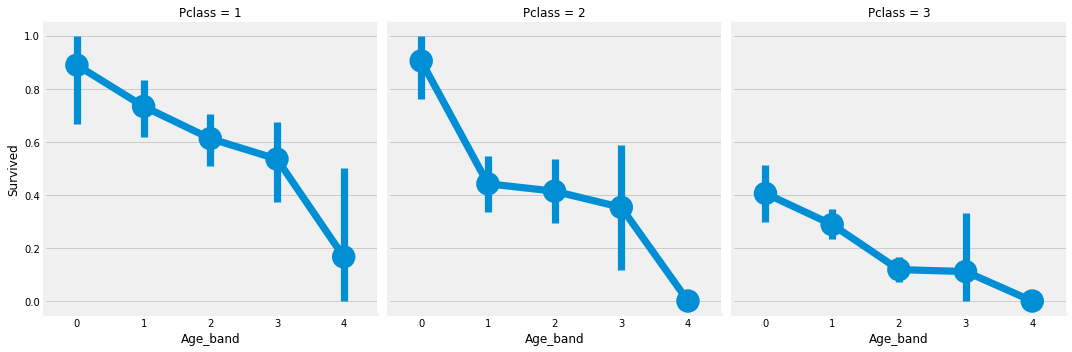

In [138]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()


사실, Pclass와 상관없이 연령이 증가할 수록 생존율이 감소합니다.

### Family_Size and Alone

이 시점에서 "Family_Size" 및 "Alone"이라는 새 기능을 만들고 분석할 수 있습니다.이 기능은 Parch와 SibSp의 합입니다. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공합니다. Alone은 승객이 혼자인지 여부를 나타냅니다.

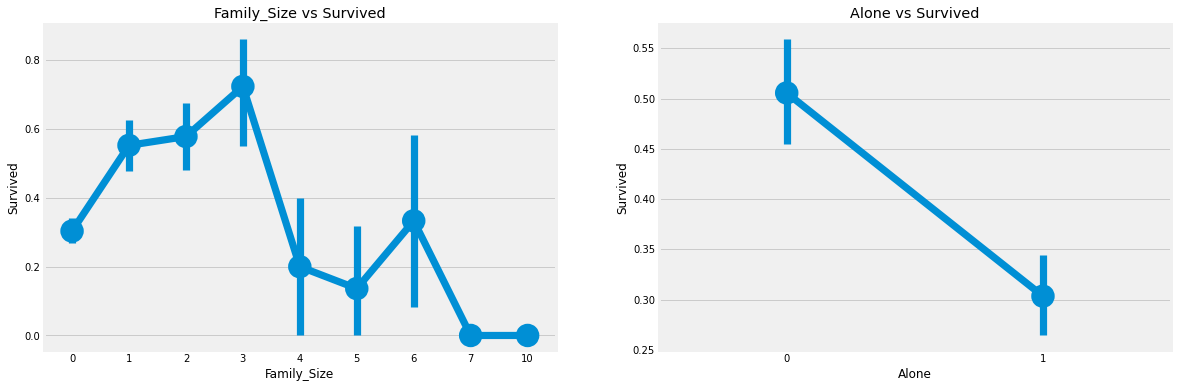

In [139]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.pointplot('Family_Size', 'Survived', data = data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
# plt.close()
#plt.close(3)
plt.show()

Family_Size = 0 은 승객이 혼자임을 의미합니다. 분명히, 당신이 혼자이거나 family_size=0인 경우 생존 가능성은 매우 낮습니다. 가족 규모 > 4 인 경우 생존률도 역시 감소합니다. 이것은 또한 모델의 중요한 feature로 보입니다.이것을 더 조사해 봅시다!

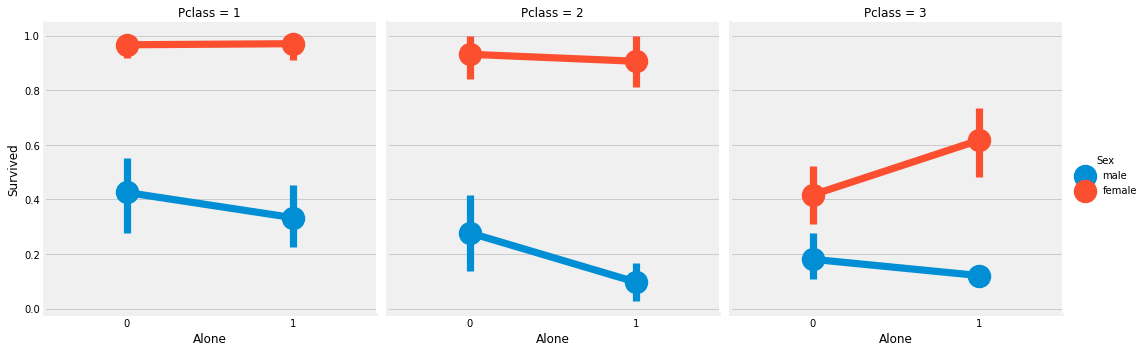

In [140]:
sns.factorplot('Alone', 'Survived', data=data , hue='Sex', col='Pclass')
plt.show()

가족이 있는 여성보다 혼자일 확률이 높은 Pclass3을 제외하고는 혼자 잇는 여성은 성별이나 Pclass를 불문하고 혼자 있는 것이 해롭다는 것을 알 수 있습니다.

### Fare_Range
요금도 연속적 특성이므로 서수 값으로 변환해야 합니다. 이를 위해 우리는 pandas.qcut을 사용할 것입니다.

따라서 qcut이 하는 일은 우리가 전달한 bin의 수에 따라 값을 분할하거나 정렬하는 것입니다. 따라서 5개의 bin에 대해 전달하면 5개의 별도 bin 또는 값 범위에 균등한 간격으로 값을 정렬합니다.

In [141]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이, 요금 범위가 증가할수록 생존 가능성이 증가한다는 것을 분명히 알 수 있습니다.이제 Fare_Range값을 그대로 전달할 수 없습니다. Age_Band에서 했던 것과 같은 싱글톤 값으로 변환해야 합니다.

In [142]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

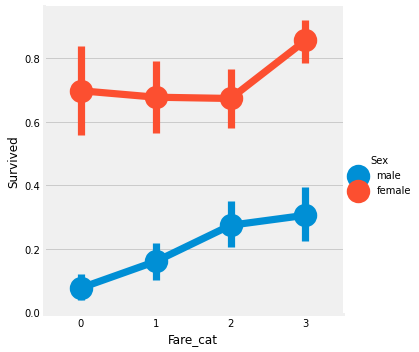

In [143]:
sns.factorplot('Fare_cat','Survived', data=data, hue='Sex')
plt.show()

분명히 fare_cat이 증가할 수록 생존확률이 높아집니다. 이 기능은 sex와 함께 모델링 시 중요한 기능이 될 수 있습니다.

### 문자열 값을 숫자로 변환!
기계학습 모델에 문자열을 전달할 수 없으므로 Sex, Embarked등과 같은 기능을 숫자 값으로 변환해 주어야 합니다.

In [144]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)


### 불필요한 feature 삭제!
**Name** -> 범주형 값으로 변환할 수 없으므로 필요하지 않다.

**Age** -> Age_band 기능이 있으므로 필요하지 않음.

**Ticket** -> 분류할 수 없는 임의의 문자열입니다.

**Fare** -> fare_cat 이 있으므로 필요없다.

**Cabin** -> 많은 NaN값과 많은 승객이 여러개의 객실을 가지고 있습니다. 따라서 이것은 쓸모없다.

**Fare_Range** -> fee_cat 기능이 있다

**Passengerid** -> 분류할 수 없다.

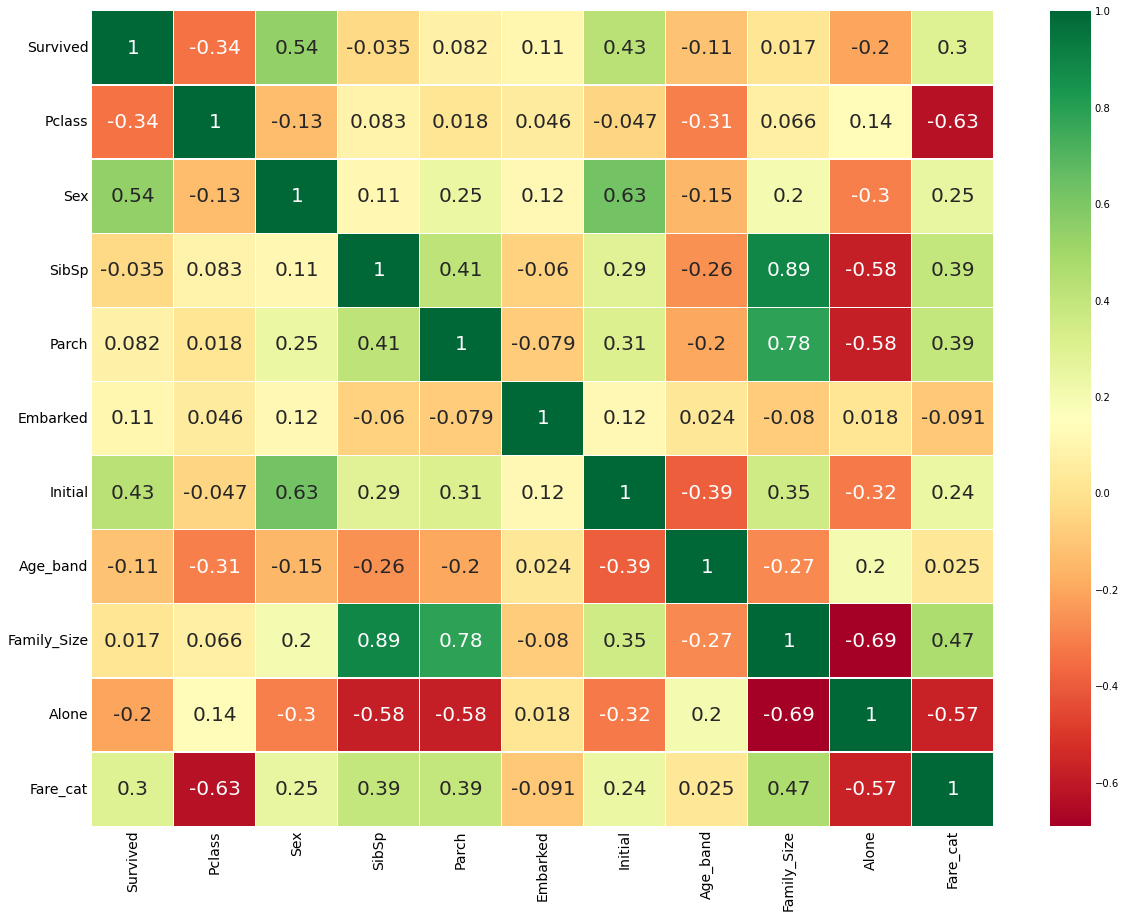

In [145]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace = True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linewidths =0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

이제 위의 상관 관계 플롯에서 몇가지 양수의 상관관계인 관련 기능을 볼 수 있습니다. 그들 중 일부는 SibSp와 Family_Size 상관관계, Parch 와 Family_Size 상관관계 , 그리고 음수의 상관관계는 Alone 과 Family_Size 사이입니다.

## Part3 : Predictive Modeling
우리는 EDA부분에서 몇가지 인사이트를 얻었습니다. 그러나 그것으로 승객이 생존할지 사망할지 정확하게 예측하거나 말할 수 없습니다. 이제 우리는 훌륭한 분류 알고리즘을 사용하여 승객이 생존할 지 여부를 예측할 것입니다.
다음은 모델을 만드는 데 사용할 알고리즘입니다:

1) 로지스틱 회귀
2) 서포트 벡터 머신
3) 랜덤 포레스트
4) k - nearest neighbors
5) 나이브 베이즈
6) 의사결정 트리
7) 로지스틱 회귀? 또?



In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix



In [147]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
# default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. 
# stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. 
#(한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 
# classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
# train 70 test 30인데,
# print(train.columns[:1])
train_X = train[train.columns[1:]]
# train 데이터의 열 중 survived 빼고 pclass... 싸그리
train_Y = train[train.columns[:1]]
# survived만 Y에 담음?
# print(test.columns[1:])
test_X =test[test.columns[1:]]
# test도 마찬가지로 X에는 survived 뺀거, Y에는 survived 컬럼만.
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']
# Y에 survived의 데이터 전체를 담음

### Radial Support Vector Machines(rbf-SVM)

In [148]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
# 커널에는 Polynomial 커널, Sigmoid 커널, 가우시안 RBF 커널 등 종류가 많은데, 
# 그 중 가장 성능이 좋아 자주 사용되는 것이 가우시안 RBF 커널이다. 
# 각 커널마다 최적화를 도와주는 매개변수들이 따로 있다. 
# 방사형 함수에는 방사형 함수를 커버해주는 커널 (rbf)이 적합!
# RBF 커널의 경우 gamma라는 매개변수를 사용자가 조정해야한다.

# C는 slack variable weight 슬랙 변수의 가중치를 의미합니다. 
# 이 값이 분류를 하는데 오차 허용하는 범위인 마진 값을 조정합니다. 
# C 값이 커지면 허용 오차의 개수가 작아지므로 가중치 값에 집중하는 경항이 발생합니다. 
# 이에 따라 margin이 좁아집니다.
# C 값이 작아지면 margin은 커지게 됩니다. 
# C 값을 통해서 margin 폭을 유연하게 조절할 수 있습니다.

# gamma는 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정한다.
# gamma는 가우시안 함수의 표준편차와 관련되어 있는데, 클수록 작은 표준편차를 갖는다. 
# 즉, gamma가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아지는 반면, 
# gamma가 낮을수록 커진다.

#C는 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도를 결정하고, 
# gamma는 결정 경계의 곡률을 결정한다.
# 참고 https://bskyvision.com/163

model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


Linear Support Vector Machine(linear-SVM)


In [149]:
model = svm.SVC(kernel='linear', C= 0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### 로지스틱 회귀분석

In [150]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))


The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [151]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8134328358208955


#### K-Nearest Neighbors(KNN)


In [152]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8134328358208955


이제 n_neighbor 속성값을 변경하면 knn모델의 정확도가 변경됩니다. 기본값은 5입니다. n_neighbor의 다양한 값에 대한 정확도를 확인해봅시다.

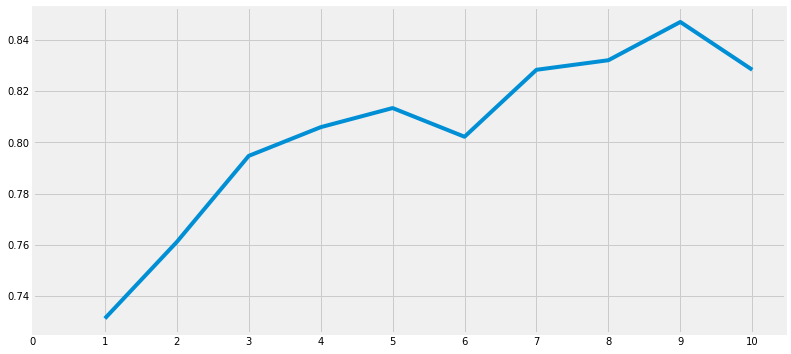

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as 0.8470149253731343


In [153]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values , 'with the max value as', a.values.max())

#### Gaussian Naive Bayes

In [154]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))


The accuracy of the NaiveBayes is  0.8134328358208955


#### Random Forests

In [155]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8134328358208955


모델의 정확도가 분류기의 견고성을 결정하는 유일한 요소는 아닙니다. 분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되었으며 90%의 정확도를 기록했다고 가정해 보겠습니다.
이제 이것은 분류기의 정확도가 매우 좋은 것 같지만, 오는 모든 새로운 테스트 세트에 대해 90%가 될 것임을 확인할 수 있습니까??
대답은 아니오입니다. 분류기가 자체 학습에 사용할 모든 인스턴스를 결정할 수 없기 때문입니다. 훈련 및 테스트 데이터가 변경되면 정확도도 변경됩니다. 증가하거나 감소할 수 있습니다. 이것을 모델 분산이라고 합니다.

이를 극복하고 일반화된 모델을 얻기 위해 cross validation을 사용합니다.

## cross validation


대부분의 데이터는 불균형합니다. 즉, class1의 인스턴스 수는 많지만 다른 클래스 인스턴스의 수는 적을 수 있습니다. 따라서 데이터셋의 모든 인스턴스에 대해 알고리즘을 훈련하고 테스트해야합니다. 그런 다음 데이터셋에 대해 언급된 모든 정확도의 평균을 취할 수 있습니다.

1) K-fold 교차검증은 먼저 데이터셋을 k-subset으로 나누어 작동합니다.    
2) 데이터 셋을 (k=5)부분으로 나눕니다. 테스트를 위해 1개 부분을 예약하고 4개 부분에 대해 알고리즘을 훈련합니다.    
3) 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 학습하여 프로세스를 계속합니다. 그런 다은 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻습니다. 이것을 K-fold 교차검증이라고 합니다.    
4) 알고리즘은 일부 훈련 데이터에 대한 데이터 셋에 대해 과소적합될수 있고 때로는 다른 훈련 세트에 대한 데이터에 과대적합 될 수도 있습니다. 따라서 교차 검증을 통해 일반화 된 모델을 얻을 수 있습니다.

In [156]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22, shuffle = True)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm', 'Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
# K fold에 사용될 분류기들
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(),KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv = kfold, scoring="accuracy")
    # 각 모델마다 얼마정도의 ??
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz, 'Std':std}, index = classifiers)
new_models_dataframe2
                                            

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.803620,0.045145
Naive Bayes,0.795843,0.054861
Random Forest,0.812622,0.045522


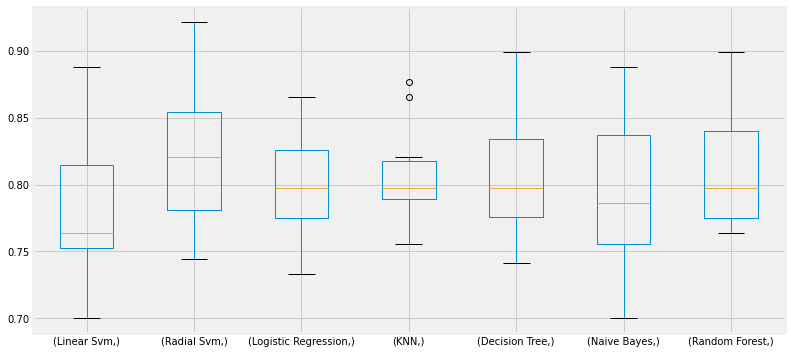

In [157]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

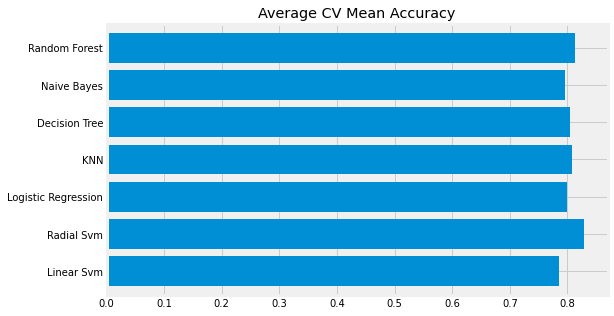

In [158]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 불균형으로 인해 때때로 오해의 소지가 있습니다. 모델이 어디서 잘못되었는지 또는 모델이 잘못 예측한 클래스를 보여주는 오차 행렬의 도움으로 요약된 결과를 얻을 수 있습니다. 

### 오차 행렬
분류기가 만든 정확한 숫자와 잘못된 분류의 수를 제공합니다.

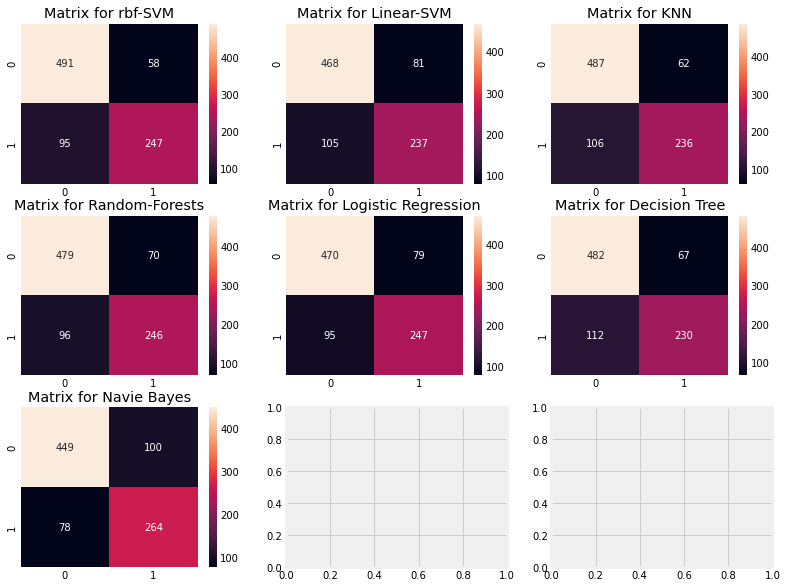

In [159]:
f, ax = plt.subplots(3,3 ,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1], annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax= ax[1,1],annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax = ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y,y_pred), ax= ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Navie Bayes')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


#### 오차행렬 해석
왼쪽 대각선은 각 클래스에 대해 수행된 올바른 예측의 수를 나타내고 오른쪽 대각선은 잘못된 예측의 수를 나타냅니다. rbf-SVM의 첫번째 플롯을 살펴봅시다.

1) 정확한 예측의 숫자는 491(사망) + 247(생존) 이며 평균 CV 정확도는 491+247 / 891 로 82.8%입니다.
2) 에러 --> 58명의 사망자를 생존자로, 95명이 사망한 것으로 잘못 분류했습니다. 따라서 죽은 사람을 생존자로 예측함으로써 더 많은 실수를 저질렀습니다. 모든 행려릉ㄹ 보면 rbf-SVM이 사망한 승객을 정확하게 예측할 확률이 더 높지만 NaiveBayes가 생존한 승객을 정확하게 예측할 확률이 더 높다고 말할 수 있습니다.

#### Hyper - parameters 튜닝!

기계학습 모델은 블랙박스와 같습니다. 이 블랙박스에 대한 몇 가지 기본 매개변수 값이 있으며 더나은 모델을 얻기 위해 조정하거나 변경할 수 있습니다. svm 모델의 c 및 감마와 마찬가지로 다른 분류기에 대한 유사하게 다른 매개변수를 하이퍼 매개변수라고 하며 알고리즘의 학습률을 변경하고 더 나은 모델을 얻기 위해 조정할 수 있습니다. 이것을 하이퍼파라미터 튜닝이라고 합니다. 우리는 2개의 best classifer, 즉 svm과 randomforest에 대한 하이퍼 매개변수를 조정할 것입니다.

In [175]:
from sklearn.model_selection import GridSearchCV
C =[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper, verbose=True, n_jobs = 2)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)
# kernel 명시안됨??
# 5개로 나눔 (5-fold)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)
{'C': 0.4, 'gamma': 0.3, 'kernel': 'rbf'}


In [174]:
# print(gd.cv_results_)


{'learning_rate': 0.1, 'n_estimators': 100}


Random Forests

In [162]:
n_estimators=range(100,1000,100) 
# 앙상블 기법에서 하위 모델을 몇개 사용할지 결정
# decision tree라서
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


rbf-svm의 최고 점수는 c=0.05 및 감마 =0.1 일 때 ?? 왜난ㄴ안나옴?
randomforest의 최고 점수는 81.%로 n_estimators=300일 때다.


### Ensembling

앙상블은 모델의 정확도나 성능을 높이는 좋은 방법입니다. 간단히 말해서 다양한 단순 모델을 조합하여 하나의 강력한 모델을 만드는 것입니다. 전화기를 구입하고 다양한 매개변수를 기반으로 많은 사람들에게 이에 대해 물어보고 싶다고 가정해 보겠습니다. 따라서 우리는 모든 다른 매개변수를 분석할 후 단일 제품에 대해 강력한 판ㄴ단을 내릴 수 있습니다.
모델의 안정성을 향상시키는 앙상블 입니다.

앙상블은 다음과 같은 방법으로 수행할 수 있습니다.    
1) voting classifier   
2) 배깅    
3) 부스팅



### Voting Classifier
다양한 단순 기계 학습 모델의 예측을 결합하는 가장 간단한 방법입니다. 모든 하위 모델의 예측을 기반으로 평균 예측 결과를 제공하빈다. 하위 모델 또는 기본 모델은 모두 다른 유형입니다.



In [163]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)), 
                                              ('RBF', svm.SVC(probability=True, kernel='rbf',C=0.5, gamma=0.1)), 
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)), 
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))], voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y,cv=10, scoring="accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


### bagging
배깅은 일반적인 앙상블 방법입니다. 데이터셋의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 취하여 작동합니다. 평균화로 인해 분산이 감소합니다. 투표 분류기와 달리 배깅은 유사한 분류기를 사용합니다.

Bagged KNN
배깅은 분산이 높은 모델에서 가장 잘 작동합니다. 이에 대한 예로는 의사결정 트리 또는 랜덤포레스트가 있습니다. n_neighbors의 작은 값으로 knn에 사용할 수 있습니다?

In [164]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


Bagged DecisionTree


In [165]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0, n_estimators=100)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged DecisionTree is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged DecisionTree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

부스팅 분류기의 순차적 학습을 사용하는 앙상블 기술입니다. 약한 모델을 단계적으로 개선하는 것입니다. 부스팅은 다음과 같이 작동합니다.:

모델은 먼저 전체 데이터셋에서 학습됩니다. 이제 모델은 일부 인스턴스는 맞고 반면에 일부는 틀리게 됩니다. 이제 다음 반복에서 학습자는 잘못 예측된 인스턴스에 더 집중하거나 더 많은 가중치를 부여합니다. 따라서 잘못된 인스턴스를 올바르게 예측하려고 시도합니다. 이제 이 반복적인 프로세스가 계속되고 정확도의 한계에 도달할 때까지 새로운 분류기가 모델에 추가됩니다.

### AdaBoost (어댑티브 부스팅)
이 경우 약한 학습자 또는 estimator는 decision tree 입니다. 그러나 우리는 default base_estimator를 우리가 선택한 알고리즘으로 변경할 수 있습니다.
(사용안하면 decision tree로 변경됨

In [166]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200, random_state = 0, learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())


The cross validated score for AdaBoost is: 0.8249188514357055


#### stochastic Gradient Boosting
여기서도 decision tree를 사용합니다.
과적합 문제가 있음

In [167]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())


The cross validated score for Gradient Boosting is: 0.8115230961298376


XGBoost    
gradient boosting의 개선버전
과적합 문제를 해결

In [168]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is :', result.mean())


The cross validated score for XGBoost is : 0.8115480649188515


AdaBoost에서 가장 높은 정확도를 얻었습니다.
Hyper-parameter tuning으로 높여보도록 하겠습니다.

Hyper-paramether tuning for adaboost

In [169]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
# 난 왜케 짧게나옴??

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


adaboost로 뽑을 수 있는 최대 정확도는 82.938%이고, n_estimator가 100이고 learning_rate가 0.1일 때다. 

### best model의 오차행렬

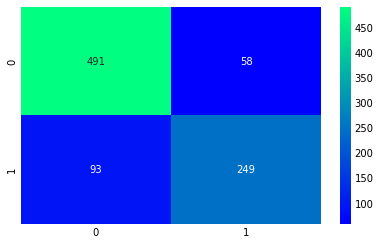

In [170]:
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result), cmap='winter',annot=True, fmt='2.0f')
plt.show()

### Feature Importance


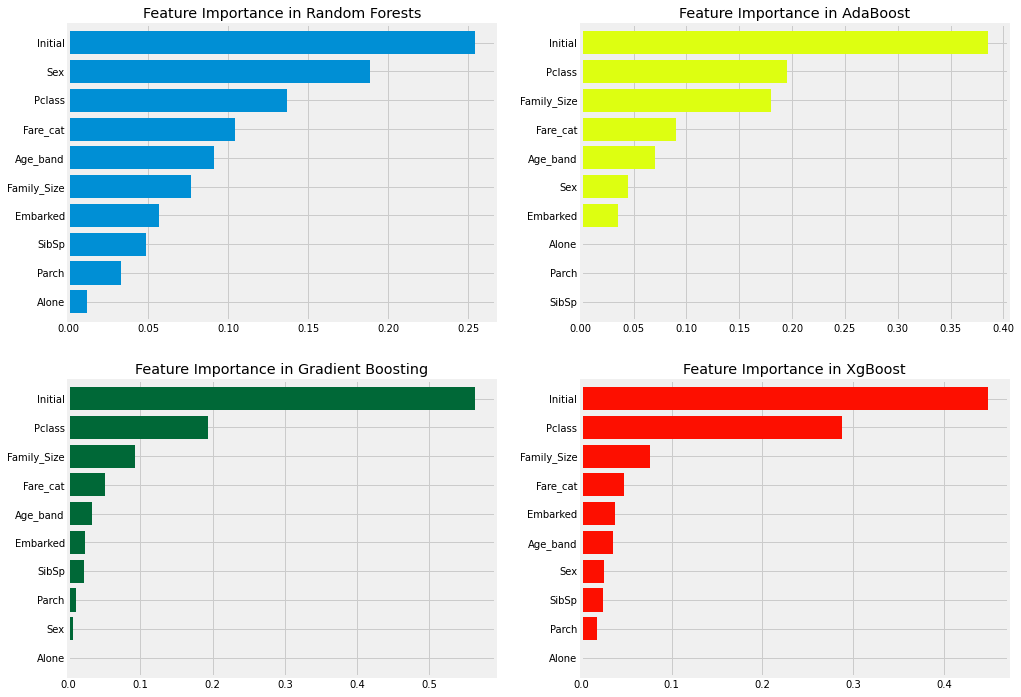

In [171]:
f, ax = plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

RandomForests, Adaboost등과 같은 다양한 분류기의 중요한 기능을 볼수 있습니다. 
관찰:
1) 일반적인 중요한 기능 중 일부는 initial, Fare_cat,Pclass,Family_size입니다.
2) sex feature는 중요하지 않은 것 같습니다.
이전에 pclass와 결합된 sex가 매우 좋은 차별화 요소를 제공하는 것을 보았듯이 충격적입니다.
sex는 randomForests에서만 중요한 것 같습니다. 그러나 우리는 많은 분류기에서 맨 위에 있는 initial 기능을 볼 수 있습니다. 우리는 이미 sex와 initial 사이의 양의 상관관계를 보았으므로 둘 다 성별을 나타냅니다.
3) 유사하게 pclass및 fare_cat은 Alone,parch및 sibsp와 함께 승객 및 family_size의 상태를 나타냅니다.

저는 여러분 모두가 기계학습에 대한 통찰력을 얻었길 바랍니다. 기계학습을 위한 다른 훌륭한 노트북은 다음과 같습니다.


1) Oscar Takeshita의 R:Divide and Conquer 2) Python의 경우: 머리와 꼬리에 의한 파이타닉 3) Python의 경우: Ensembling/Stacking 소개 이방성 이 노트북을 봐주셔서 감사합니다. 이 노트북이 유용하다고 생각하셨다면 투표를 하세요.¶